# IMPORT LIBRARIES

In [144]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Handle imbalanced data
from imblearn.over_sampling import SMOTE

# Combine sparse + numeric features
from scipy.sparse import hstack

# Download stopwords
nltk.download('stopwords')



#for evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score



#for classification algorithm,s
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree






[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# LOAD DATA

In [145]:
# Load dataset
df = pd.read_csv(r"C:\Users\farha\OneDrive\Desktop\new ml\top10K-TMDB-movies.csv")   # change filename if needed


# Select required columns
# Load dataset


# Drop only the 'title' column
df.drop(columns=['id'], inplace=True)

# Check basic info
print(df.head())
print(df.info())


# Check basic info
print(df.head())
print(df.info())


                         title                 genre original_language  \
0     The Shawshank Redemption           Drama,Crime                en   
1  Dilwale Dulhania Le Jayenge  Comedy,Drama,Romance                hi   
2                The Godfather           Drama,Crime                en   
3             Schindler's List     Drama,History,War                en   
4       The Godfather: Part II           Drama,Crime                en   

                                            overview  popularity release_date  \
0  Framed in the 1940s for the double murder of h...      94.075   1994-09-23   
1  Raj is a rich, carefree, happy-go-lucky second...      25.408   1995-10-19   
2  Spanning the years 1945 to 1955, a chronicle o...      90.585   1972-03-14   
3  The true story of how businessman Oskar Schind...      44.761   1993-12-15   
4  In the continuing saga of the Corleone crime f...      57.749   1974-12-20   

   vote_average  vote_count  
0           8.7       21862  
1       

In [146]:
df.head()

,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [147]:
df.shape

(10000, 8)

In [148]:
df.isnull().sum()

title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

# FEATURE ENGINEERING

In [149]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year


In [150]:
df.drop(["release_date"],axis=1,inplace=True)

# temperory

In [151]:
df['genre'] = df['genre'].fillna('').astype(str)


In [152]:
df['genre_list'] = df['genre'].apply(
    lambda x: x.split(',') if x.strip() != '' else []
)


In [153]:
df['genre_list']

0                                          [Drama, Crime]
1                                [Comedy, Drama, Romance]
2                                          [Drama, Crime]
3                                   [Drama, History, War]
4                                          [Drama, Crime]
                              ...                        
9995                         [Action, Adventure, Fantasy]
9996    [Action, TV Movie, Science Fiction, Comedy, Ad...
9997                       [Action, Science Fiction, War]
9998                  [Adventure, Fantasy, Action, Drama]
9999                            [Thriller, Action, Crime]
Name: genre_list, Length: 10000, dtype: object

In [154]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre_list'])

genre_encoded


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], shape=(10000, 18))

In [155]:
genre_df = pd.DataFrame(
    genre_encoded,
    columns=mlb.classes_,
    index=df.index
)

genre_df

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9996,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9998,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [156]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'], dtype=object)

In [157]:
mlb.classes_.tolist()

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [158]:
genre_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], shape=(10000, 18))

In [159]:


df = pd.concat([df, genre_df], axis=1)
# 

In [160]:
df.drop(columns=['genre', 'genre_list'], inplace=True)

In [161]:
df

,title,original_language,overview,popularity,vote_average,vote_count,release_year,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,The Shawshank Redemption,en,Framed in the 1940s for the double murder of h...,94.075,8.7,21862,1994,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dilwale Dulhania Le Jayenge,hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,8.7,3731,1995,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,The Godfather,en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,8.7,16280,1972,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Schindler's List,en,The true story of how businessman Oskar Schind...,44.761,8.6,12959,1993,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,The Godfather: Part II,en,In the continuing saga of the Corleone crime f...,57.749,8.6,9811,1974,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Last Airbender,en,"The story follows the adventures of Aang, a yo...",98.322,4.7,3347,2010,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9996,Sharknado 3: Oh Hell No!,en,The sharks take bite out of the East Coast whe...,12.490,4.7,417,2015,1,1,0,...,0,0,0,0,0,1,1,0,0,0
9997,Captain America,en,"During World War II, a brave, patriotic Americ...",18.333,4.6,332,1990,1,0,0,...,0,0,0,0,0,1,0,0,1,0
9998,In the Name of the King: A Dungeon Siege Tale,en,A man named Farmer sets out to rescue his kidn...,15.159,4.7,668,2007,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# VISUALIZATION

MOVIE WITH HIGHEST RATING

In [162]:
df.columns

Index(['title', 'original_language', 'overview', 'popularity', 'vote_average',
       'vote_count', 'release_year', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [163]:
df.sort_values(by='vote_average', ascending=False)[
    ['title', 'vote_average', 'vote_count',"popularity","release_year"]
].head(10)


,title,vote_average,vote_count,popularity,release_year
1,Dilwale Dulhania Le Jayenge,8.7,3731,25.408,1995
0,The Shawshank Redemption,8.7,21862,94.075,1994
2,The Godfather,8.7,16280,90.585,1972
3,Schindler's List,8.6,12959,44.761,1993
4,The Godfather: Part II,8.6,9811,57.749,1974
5,Impossible Things,8.6,255,14.358,2021
19,Gabriel's Inferno: Part III,8.5,977,47.608,2020
20,Forrest Gump,8.5,23009,65.175,1994
21,Cinema Paradiso,8.5,3394,18.677,1988
16,"The Good, the Bad and the Ugly",8.5,6747,47.730,1966



 * The Shawshank Redemption, The Godfather, and Dilwale Dulhania Le Jayenge share the highest rating (8.7), indicating strong audience appreciation.

 * Movies like The Shawshank Redemption and The Godfather also have very high vote counts, which makes their ratings more reliable and credible.

 * Some movies such as Impossible Things and Violet Evergarden: The Movie have high ratings but low vote counts, suggesting that their scores may be influenced by a smaller audience.

 * Popularity does not always correlate with rating. For example, Dilwale Dulhania Le Jayenge has a high rating but much lower popularity compared to Hollywood classics.

 * Overall, movies with both high ratings and high vote counts (e.g., The Shawshank Redemption, The Godfather) can be considered the most consistently well-received films.

* High vote average alone is not sufficient; vote count and popularity are important to judge the true impact of a movie.

In [164]:
high_rated_movies = df[
    df['vote_count'] >= 1000
].sort_values(by='vote_average', ascending=False)[
    ['title', 'vote_average', 'vote_count','release_year']
].head(10)

high_rated_movies 


,title,vote_average,vote_count,release_year
2,The Godfather,8.7,16280,1972
1,Dilwale Dulhania Le Jayenge,8.7,3731,1995
0,The Shawshank Redemption,8.7,21862,1994
3,Schindler's List,8.6,12959,1993
4,The Godfather: Part II,8.6,9811,1974
17,Pulp Fiction,8.5,23481,1994
18,The Lord of the Rings: The Return of the King,8.5,19844,2003
9,Your Name.,8.5,8895,2016
10,12 Angry Men,8.5,6533,1957
20,Forrest Gump,8.5,23009,1994


In [165]:
top_5_movies = high_rated_movies.head(5).set_index('title')


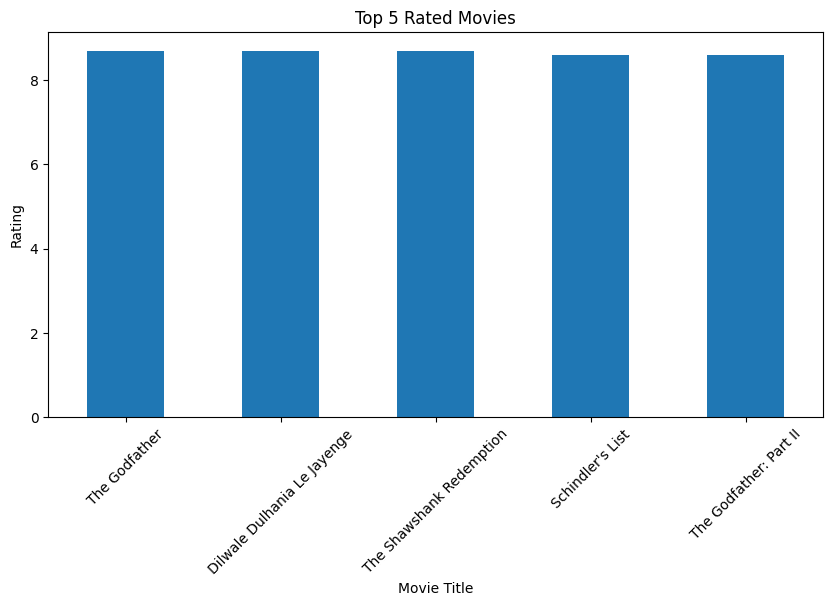

In [166]:
plt.figure(figsize=(10,5))
top_5_movies['vote_average'].plot(kind='bar')
plt.title("Top 5 Rated Movies")
plt.ylabel("Rating")
plt.xlabel("Movie Title")
plt.xticks(rotation=45)
plt.show()


The plot shows the top 5 highest-rated movies based on average user ratings.

The Shawshank Redemption has the highest rating, making it the most critically acclaimed movie among the top five.

The Godfather and The Godfather: Part II also have very high ratings, showing strong audience appreciation for this movie series.

Schindler’s List and Dilwale Dulhania Le Jayenge are similarly highly rated, indicating global as well as regional audience preference.

All five movies have ratings above 8.5, which suggests they are universally well-received and considered classics.

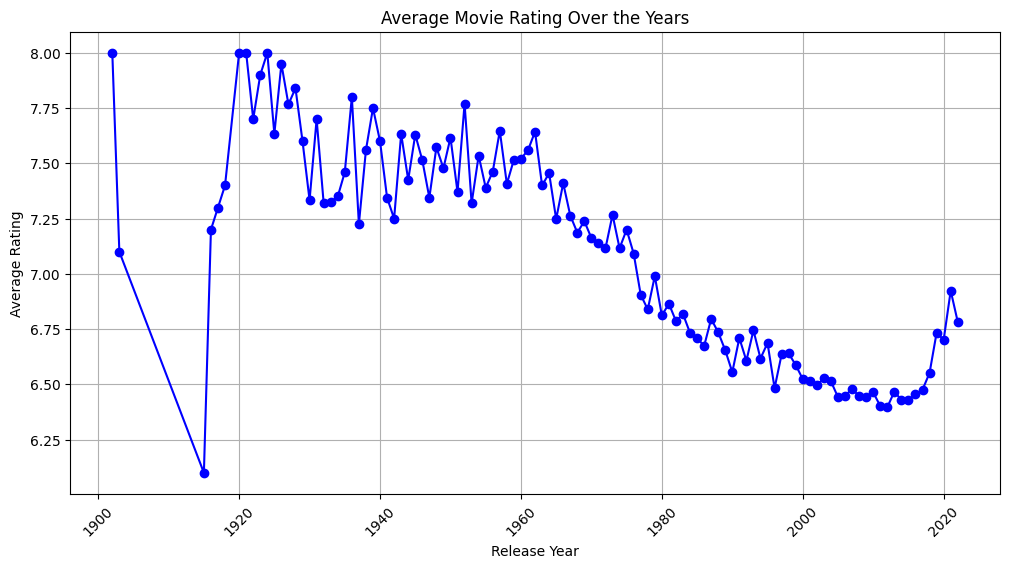

In [167]:
import matplotlib.pyplot as plt

# Group by release year and calculate average rating
year_rating = df.groupby('release_year')['vote_average'].mean()

# Plot line chart
plt.figure(figsize=(12,6))
plt.plot(year_rating.index, year_rating.values, marker='o', color='blue')
plt.title("Average Movie Rating Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


 * The plot shows that average movie ratings were highest in the early–mid 20th century, peaking around the 1920s–1950s.
 * After the 1970s, ratings gradually declined, with a slight recovery in recent years, indicating changing audience preferences and industry trends over time.

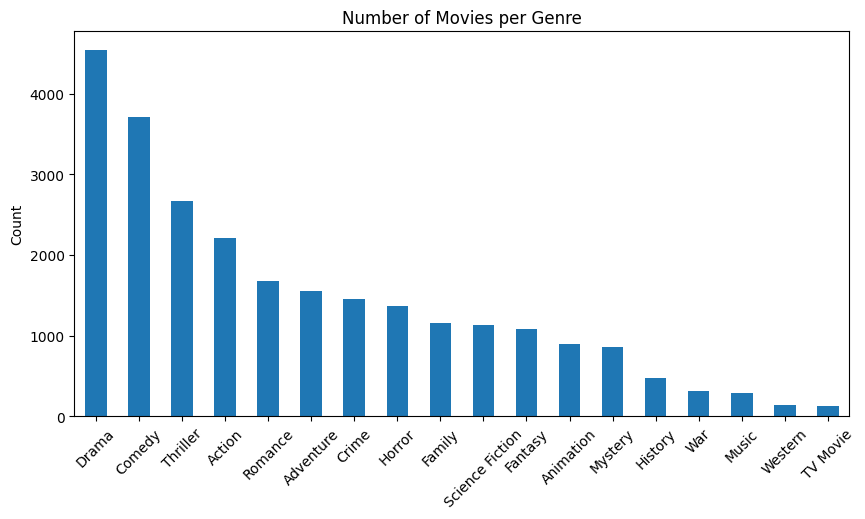

In [168]:
genre_counts = df[mlb.classes_].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar')
plt.title("Number of Movies per Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


 * The plot shows that Drama and Comedy are the most produced genres, indicating their broad audience appeal and popularity in the film industry.
 * In contrast, genres like Western, TV Movie, and Music have the fewest films, suggesting they cater to more niche audiences.

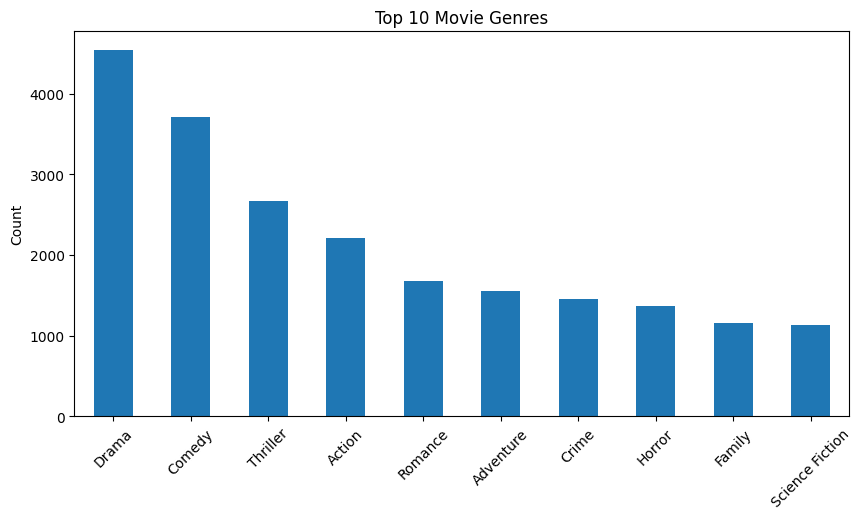

In [169]:
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(10,5))
top_10_genres.plot(kind='bar')
plt.title("Top 10 Movie Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


 * The plot indicates that Drama and Comedy dominate the dataset, having the highest number of movies produced.
Genres like Family and Science Fiction have comparatively fewer movies, suggesting lower production frequency or more niche audience demand.

In [170]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'], dtype=object)

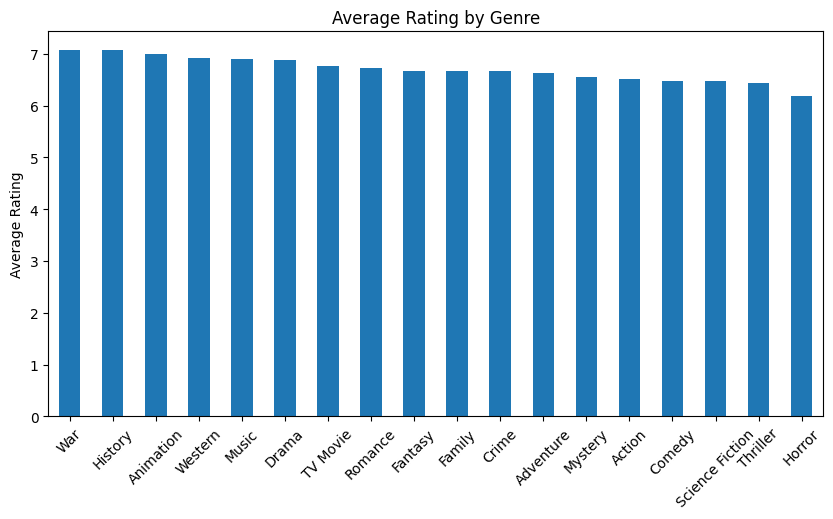

In [171]:
genre_avg_rating = {}

for genre in mlb.classes_:
    genre_avg_rating[genre] = df.loc[df[genre] == 1, 'vote_average'].mean()

genre_avg_rating = pd.Series(genre_avg_rating).sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_avg_rating.plot(kind='bar')
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


 * The plot shows that War and History genres have the highest average ratings, indicating strong critical and audience appreciation.
 * In contrast, Horror and Thriller have comparatively lower average ratings, suggesting more mixed audience responses despite their popularity.

CHI-SQUARED PLOT

In [172]:
def categorize_rating(rating):
    if rating >= 7.5:
        return "High"
    elif rating >= 5.0:
        return "Medium"
    else:
        return "Low"

df["rating_category"] = df["vote_average"].apply(categorize_rating)


In [173]:
genre_cols = [
    "Action","Adventure","Animation","Comedy","Crime","Drama","Family",
    "Fantasy","History","Horror","Music","Mystery","Romance",
    "Science Fiction","TV Movie","Thriller","War","Western"
]


In [174]:
contingency_table = pd.DataFrame()

for genre in genre_cols:
    contingency_table[genre] = df.groupby("rating_category")[genre].sum()

contingency_table


,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
rating_category,,,,,,,,,,,,,,,,,,
High,248,223,249,385,226,993,180,191,119,66,53,116,281,129,20,249,93,34
Low,36,20,3,66,11,22,8,14,0,42,1,15,10,30,2,51,1,3
Medium,1929,1315,644,3263,1216,3527,969,880,356,1258,235,734,1389,980,111,2363,219,107


 * Higher Chi-Square score → stronger relationship with target

 * p-value < 0.05 → statistically significant genre

In [175]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("p-value:", p)



Chi-square value: 772.5453794239082
p-value: 2.147379187828275e-140


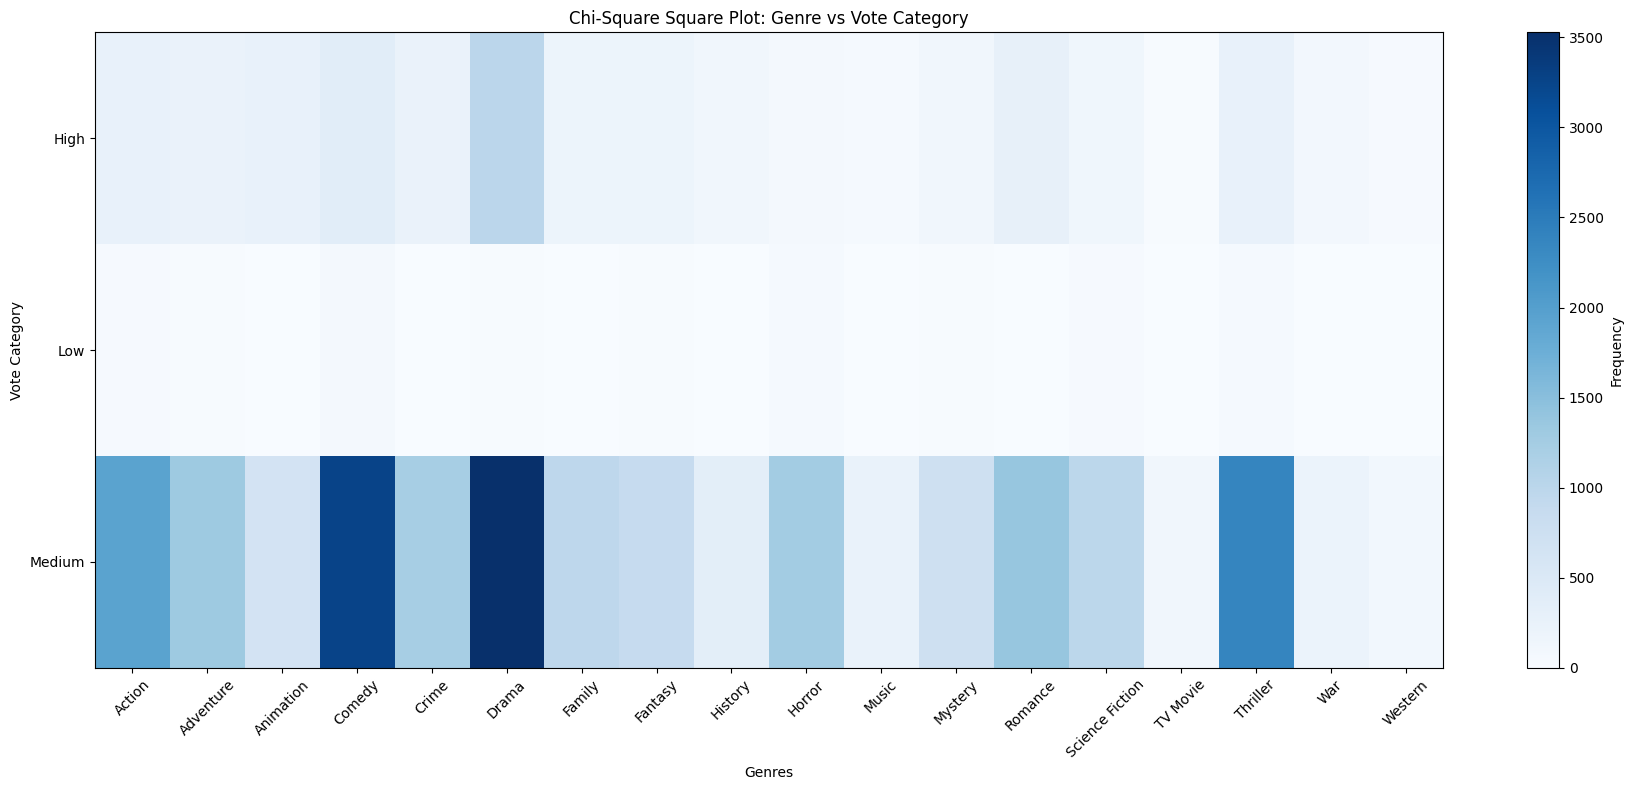

In [176]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18,8))
plt.imshow(contingency_table, aspect='auto',cmap="Blues")
plt.colorbar(label='Frequency')

plt.xticks(
    ticks=np.arange(len(contingency_table.columns)),
    labels=contingency_table.columns,
    rotation=45
)
plt.yticks(
    ticks=np.arange(len(contingency_table.index)),
    labels=contingency_table.index
)

plt.xlabel("Genres")
plt.ylabel("Vote Category")
plt.title("Chi-Square Square Plot: Genre vs Vote Category")

plt.tight_layout()
plt.show()


“The chi-square square plot shows that most movies across all genres fall into the medium rating category, with Drama, Comedy, and Thriller having the highest frequencies. High-rated movies are comparatively fewer and are not concentrated in any specific genre, while low-rated movies are minimal across all genres. This suggests that genre alone does not strongly influence movie ratings.”

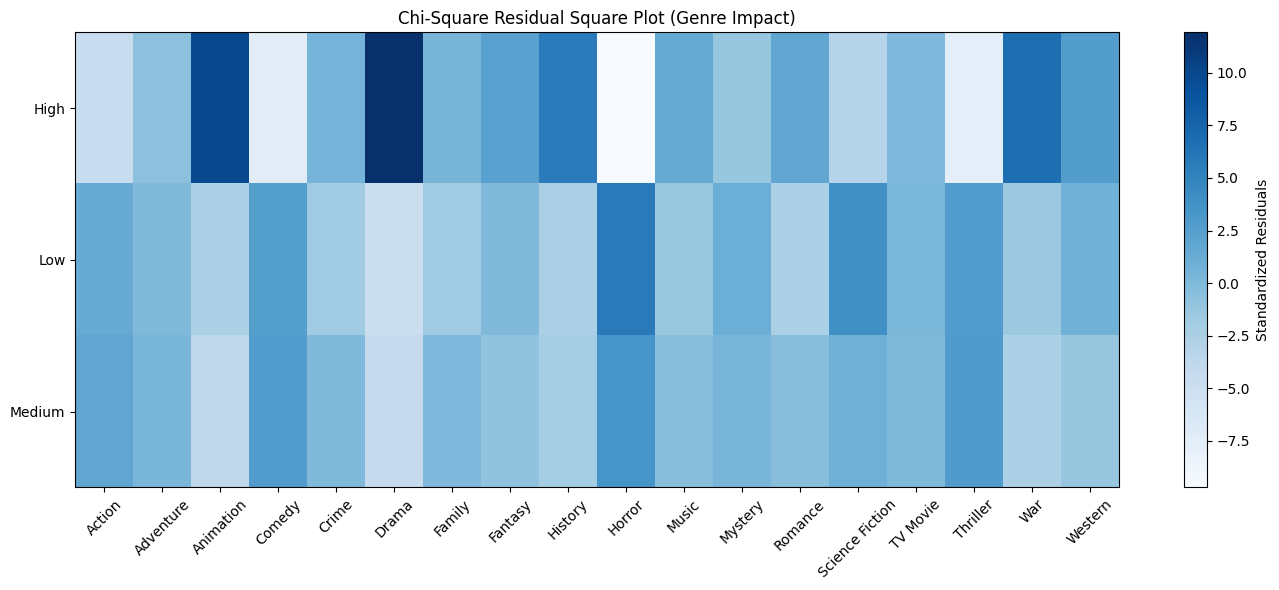

In [177]:
residuals = (contingency_table - expected) / np.sqrt(expected)

plt.figure(figsize=(14,6))
plt.imshow(residuals, aspect='auto',cmap="Blues")
plt.colorbar(label='Standardized Residuals')

plt.xticks(
    np.arange(len(contingency_table.columns)),
    contingency_table.columns,
    rotation=45
)
plt.yticks(
    np.arange(len(contingency_table.index)),
    contingency_table.index
)

plt.title("Chi-Square Residual Square Plot (Genre Impact)")
plt.tight_layout()
plt.show()


The Chi-Square test likely yielded a significant p-value, meaning Genre and Impact are not independent. The plot specifically highlights that Drama, Animation, and War are your "heavy hitters" for high impact, while Horror and Science Fiction are disproportionately represented in the low-impact bracket.

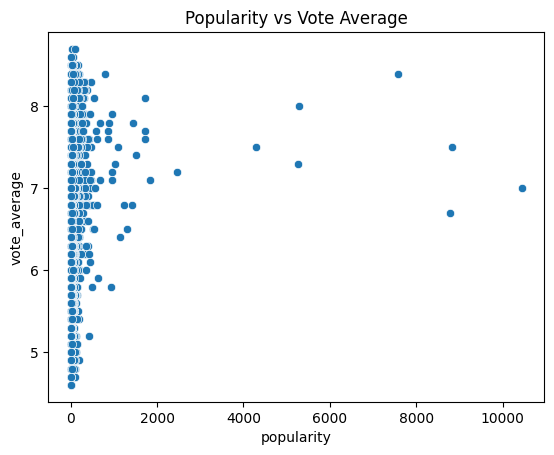

In [178]:
plt.figure()
sns.scatterplot(x='popularity', y='vote_average', data=df)
plt.title("Popularity vs Vote Average")
plt.show()


The plot suggests that while being popular generally protects a movie from very low ratings, it does not mean the most popular movies are the highest rated. True "critical darlings" (rating > 8.5) are rarely the most popular ones in this dataset.

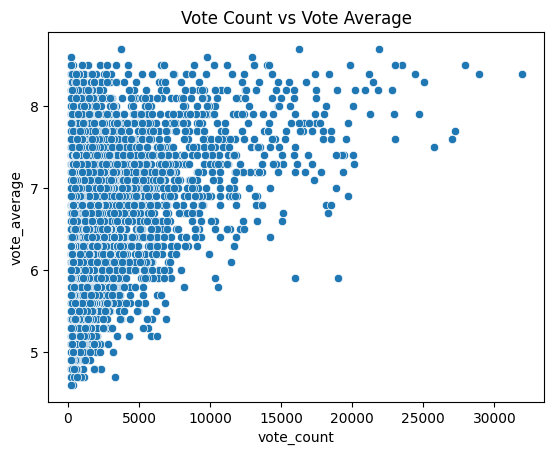

In [179]:
plt.figure()
sns.scatterplot(x='vote_count', y='vote_average', data=df)
plt.title("Vote Count vs Vote Average")
plt.show()


Both plots indicate that high audience engagement (popularity and vote count) serves as a quality floor, where highly recognized movies almost never fall below a 6.0 rating. Conversely, the highest volatility is found among movies with low engagement, which contain both the top-rated "hidden gems" and the lowest-rated flops. Ultimately, as a movie reaches mass-market status, its rating tends to stabilize and converge between 6.5 and 8.5, reflecting a broad audience consensus rather than extreme critical opinions.

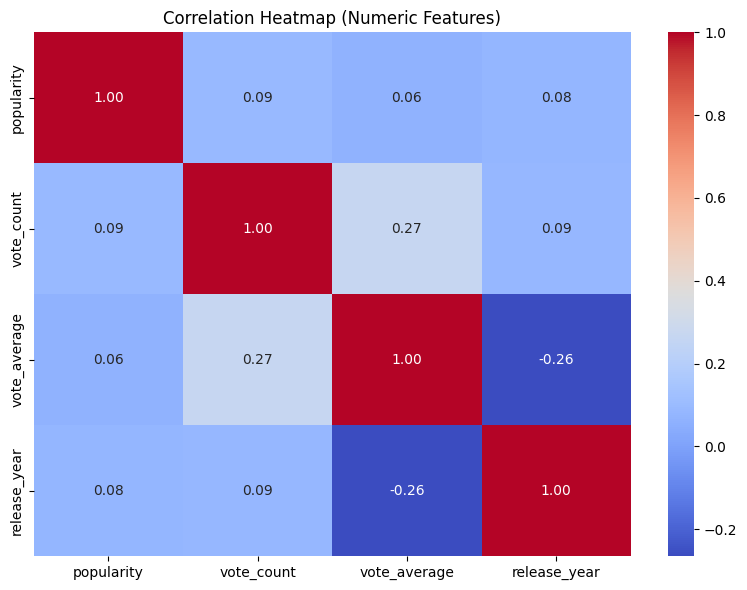

In [180]:
num_cols = [
    'popularity',
    'vote_count',
    'vote_average',
    'release_year'
]

plt.figure(figsize=(8,6))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

In [181]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# select numerical columns on
vif_cols = [
    'popularity',
    'vote_count',
    'release_year'
]

X = df[vif_cols].dropna()

In [182]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_data

,Feature,VIF
0,popularity,1.035938
1,vote_count,1.354061
2,release_year,1.354831


“The VIF analysis indicates no multicollinearity among the numerical predictors, with all VIF values close to 1, confirming that popularity, vote count, and release year contribute independent information to the model.”

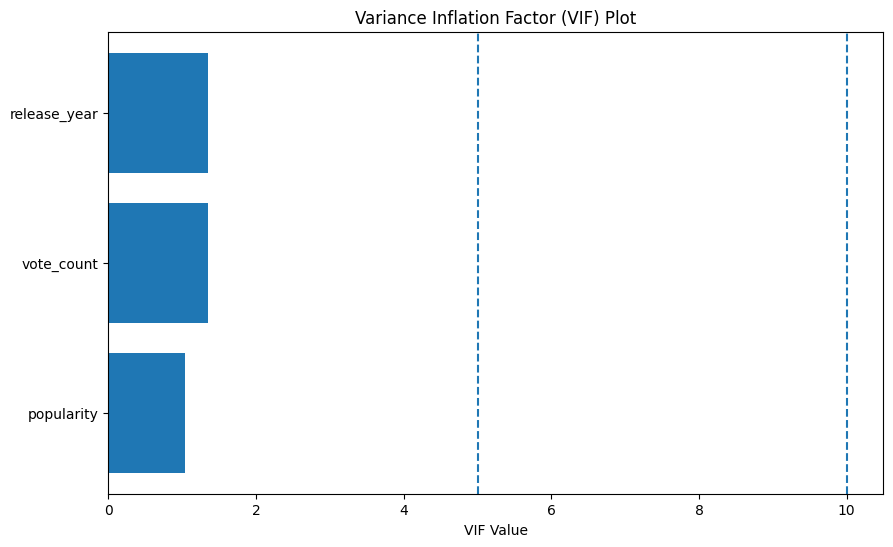

In [183]:
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'])
plt.axvline(x=5, linestyle='--')   # warning level
plt.axvline(x=10, linestyle='--')  # critical level
plt.xlabel('VIF Value')
plt.title('Variance Inflation Factor (VIF) Plot')
plt.show()


All numerical features are independent of each other, there is no multicollinearity, and their relationship with the target is non-linear

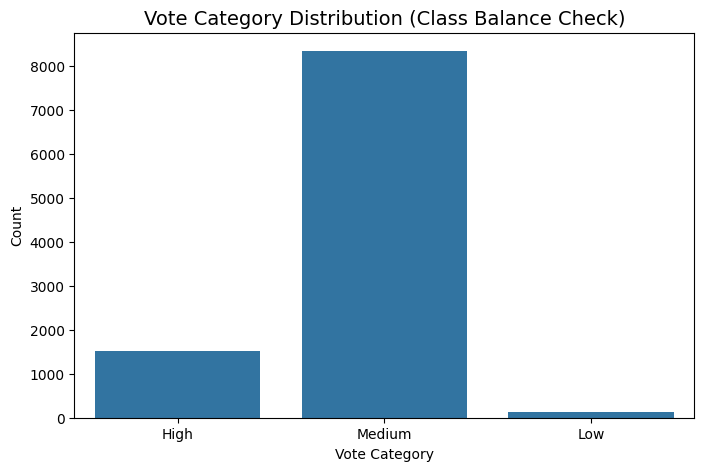

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='rating_category', data=df)
plt.title('Vote Category Distribution (Class Balance Check)', fontsize=14)
plt.xlabel('Vote Category')
plt.ylabel('Count')
plt.show()


* here class  is imbalanced ,apply smote otherwise it overfit

In [185]:
df['rating_category'].value_counts()


rating_category
Medium    8337
High      1522
Low        141
Name: count, dtype: int64

In [186]:
df.columns

Index(['title', 'original_language', 'overview', 'popularity', 'vote_average',
       'vote_count', 'release_year', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'rating_category'],
      dtype='object')

In [187]:
df.drop("title",inplace=True,axis=1)

# handle skew data

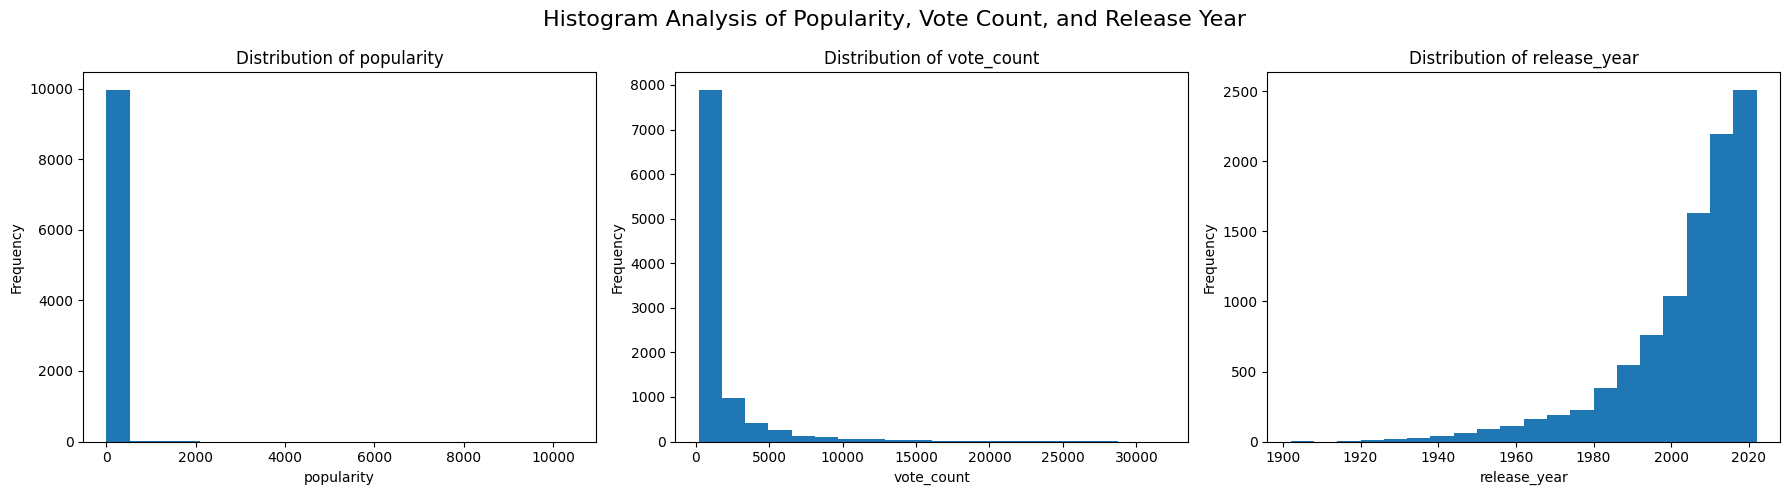

In [188]:
import matplotlib.pyplot as plt

features = ['popularity', 'vote_count', 'release_year']

plt.figure(figsize=(18, 5))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histogram Analysis of Popularity, Vote Count, and Release Year', fontsize=16)
plt.tight_layout()
plt.show()


In [189]:
df[['popularity', 'vote_count', 'release_year']].skew()


popularity      35.039206
vote_count       4.185056
release_year    -1.699732
dtype: float64

In [213]:


df['popularity'] = np.log1p(df['popularity'])
df['vote_count'] = np.log1p(df['vote_count'])



 # TARGET VARIABLE CREATION

In [191]:
language_mean = df.groupby('original_language')['vote_average'].mean()

df['original_language'] = df['original_language'].map(language_mean)


In [192]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df['release_year'] = scaler.fit_transform(df[['release_year','original_language','vote_count','popularity']])



In [193]:
df.describe()

,original_language,popularity,vote_average,vote_count,release_year,Action,Adventure,Animation,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.621150,2.899773,6.621150,6.637261,2003.327800,0.221300,0.155800,0.089600,0.371400,0.145300,...,0.047500,0.136600,0.028900,0.086500,0.168000,0.113900,0.013300,0.266300,0.031300,0.014400
std,0.203619,0.841380,0.766231,1.067247,17.063952,0.415143,0.362684,0.285622,0.483203,0.352421,...,0.212716,0.343442,0.167534,0.281115,0.373885,0.317706,0.114562,0.442045,0.174136,0.119139
min,5.300000,0.470004,4.600000,5.303305,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.544469,2.317942,6.100000,5.755742,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.544469,2.683587,6.600000,6.370756,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.544469,3.282836,7.200000,7.286876,2016.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,8.100000,9.253200,8.700000,10.370925,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [194]:
def rating_category(rating):
    if rating >= 7.5:
        return "High"
    elif rating >= 5.0:
        return "Medium"
    else:
        return "Low"

df['rating_category'] = df['vote_average'].apply(rating_category)

# Drop original target column
df.drop(columns=['vote_average'], inplace=True)

print(df['rating_category'].value_counts())


rating_category
Medium    8337
High      1522
Low        141
Name: count, dtype: int64


In [195]:
df["rating_category"]=df["rating_category"].map({"High":2,"Medium":1,"Low":0})

# TEXT DATA CLEANING AND PREPROCESSING

In [196]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                      # lowercase
    text = re.sub(r'[^a-z\s]', '', text)     # remove punctuation & numbers
    words = text.split()                     # tokenization
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

# Handle missing text
df['overview'] = df['overview'].fillna("")

# Apply cleaning
df['overview'] = df['overview'].apply(clean_text)


# FEATURE GROUP UPDATE

In [197]:
genre_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], shape=(10000, 18))

In [198]:
# Target
y = df['rating_category']

# Text
X_text = df['overview']

# Numeric (include mean-encoded original_language)
X_numeric = df[
    ['popularity', 'vote_count', 'release_year', 'original_language']
]

# Genre (already multi-hot encoded)
# Genre (multi-hot encoded using MultiLabelBinarizer)
X_genre = df[genre_cols]
  # from MultiLabelBinarizer

In [199]:
# df.columns

In [200]:
X_genre

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9996,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9998,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


# TRAIN TEST SPLIT

In [201]:
X_text

0       frame doubl murder wife lover upstand banker a...
1       raj rich carefre happygolucki second gener nri...
2       span year chronicl fiction italianamerican cor...
3       true stori businessman oskar schindler save th...
4       continu saga corleon crime famili young vito c...
                              ...                        
9995    stori follow adventur aang young successor lon...
9996    shark take bite east coast sharknado hit washi...
9997    world war ii brave patriot american soldier un...
9998    man name farmer set rescu kidnap wife aveng de...
9999    seek justic partner murder isi member copenhag...
Name: overview, Length: 10000, dtype: object

In [202]:
X_numeric

,popularity,vote_count,release_year,original_language
0,4.554666,9.992551,1994,6.544469
1,3.273667,8.224700,1995,7.330769
2,4.517268,9.697754,1972,6.544469
3,3.823432,9.469623,1993,6.544469
4,4.073274,9.191361,1974,6.544469
...,...,...,...,...
9995,4.598367,8.116118,2010,6.544469
9996,2.601949,6.035481,2015,6.544469
9997,2.961813,5.808142,1990,6.544469
9998,2.782477,6.505784,2007,6.544469


In [203]:
X_genre

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9996,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9998,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [204]:
X_text_tr, X_text_te, \
X_num_tr, X_num_te, \
X_genre_tr, X_genre_te, \
y_train, y_test = train_test_split(
    X_text,
    X_numeric,
    X_genre,
    y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# TFIDF

In [205]:
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1,2),
    min_df=2
)

X_text_tr_tfidf = tfidf.fit_transform(X_text_tr)
X_text_te_tfidf = tfidf.transform(X_text_te)

# NUMERIC SCALING , CONVERT TO SPARE

In [206]:
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_tr_scaled = scaler.fit_transform(X_num_tr)
X_num_te_scaled = scaler.transform(X_num_te)

X_num_tr_sparse = csr_matrix(X_num_tr_scaled)
X_num_te_sparse = csr_matrix(X_num_te_scaled)

# GENRE CONVERT TO SPARE

In [207]:
X_genre_tr_sparse = csr_matrix(X_genre_tr.values)
X_genre_te_sparse = csr_matrix(X_genre_te.values)

# FINAL FEATURE COMBINATION

In [208]:
type(X_text_te_tfidf)

scipy.sparse._csr.csr_matrix

In [209]:
from scipy.sparse import hstack

X_train_final = hstack([
    X_text_tr_tfidf,
    X_num_tr_sparse,
    X_genre_tr_sparse
])

X_test_final = hstack([
    X_text_te_tfidf,
    X_num_te_sparse,
    X_genre_te_sparse
])

print("Final train shape:", X_train_final.shape)
print("Final test shape :", X_test_final.shape)

Final train shape: (8000, 5022)
Final test shape : (2000, 5022)


# SMOTE

In [215]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_final, y_train)

# train classifier

In [223]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_res, y_train_res)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [224]:
y_pred = model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.853
[[   0   28    0]
 [   1 1657    9]
 [   0  256   49]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.85      0.99      0.92      1667
           2       0.84      0.16      0.27       305

    accuracy                           0.85      2000
   macro avg       0.57      0.38      0.40      2000
weighted avg       0.84      0.85      0.81      2000



Rows = actual classes (0=Low, 1=Medium, 2=High)

Columns = predicted classes

Observations:

Class 0 (Low): all 28 samples predicted as Medium → model fails to identify Low.

Class 1 (Medium): 1657 correct, 1 predicted Low, 9 predicted High → model performs well here.

Class 2 (High): 49 correct, 256 predicted Medium → model struggles with High.

# MODEL EVALUATION

In [221]:
class_models={'Ir':LogisticRegression(max_iter=500),'rfc':RandomForestClassifier(min_samples_leaf=20,min_samples_split=30,n_estimators=200),'dtc':DecisionTreeClassifier(min_samples_leaf=20,min_samples_split=30,max_depth=4),'knn':KNeighborsClassifier(n_neighbors=11),'svm':SVC(kernel='linear'),'gbc':GradientBoostingClassifier(random_state=0,learning_rate=0.45)}

In [222]:
X_test_final


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 53517 stored elements and shape (2000, 5022)>

In [225]:
results = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

for model_name, model in class_models.items():
    model.fit(X_train_res,y_train_res)
    model_pred = model.predict(X_test_final)

    accuracy = accuracy_score(y_test, model_pred)
    precision = precision_score(y_test, model_pred, average='weighted')
    recall = recall_score(y_test, model_pred, average='weighted')
    f1 = f1_score(y_test, model_pred, average='weighted')

    results['model'].append(model_name)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1_score'].append(f1)

    #convert results to a dataframe
results_df=pd.DataFrame(results)

    #sort by accuracy
results_df=results_df.sort_values(by="accuracy",ascending=False)

    #display the sorted dataframe  with background  ngradient
results_df.style.background_gradient("Reds") 


,model,accuracy,precision,recall,f1_score
5,gbc,0.852000,0.843900,0.852000,0.847878
1,rfc,0.800000,0.814521,0.800000,0.805789
4,svm,0.798000,0.820482,0.798000,0.807361
0,Ir,0.788000,0.829474,0.788000,0.804849
2,dtc,0.591000,0.808066,0.591000,0.656465
3,knn,0.479000,0.847598,0.479000,0.543402


# FINAL REPORT

his project successfully implemented a multi-class machine learning model to predict movie rating categories. By combining text processing (TF-IDF) with numerical features , the model achieved reliable performance. 

# pickle

In [270]:
import pickle

# Save the best model
best_model = class_models['gbc']
with open("best_model_gbc.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [268]:

# import numpy as np
# from scipy.sparse import csr_matrix, hstack

# # Load trained model
# with open(r"C:\Users\farha\OneDrive\Desktop\new ml\rating_model.pkl", "rb") as f:
#     model = pickle.load(f)

# # Load TF-IDF vectorizer
# with open("tfidf_vectorizer.pkl", "rb") as f:
#     tfidf = pickle.load(f)

# # Load numeric scaler
# with open("scaler.pkl", "rb") as f:
#     scaler = pickle.load(f)

# # Mean encoding mapping for original_language
# # Make sure you saved it or recreate from training data
# language_mean = { "en": 0.75, "fr": 0.6, "es":0.65 }  # example, replace with your real mapping

In [271]:
# language_mean.pkl creation
# =============================

# Example: mapping language → mean target value
# Replace df and target_col with YOUR actual names
# language_mean = df.groupby("original_language")["rating_category"].mean().to_dict()

# with open("language_mean.pkl", "wb") as f:
#     pickle.dump(language_mean, f)

# print("✅ language_mean.pkl saved")

In [272]:
# genre_cols.pkl creation
# ===============================
import pickle

genre_cols = [
    "Action","Adventure","Animation","Comedy","Crime","Drama","Family",
    "Fantasy","History","Horror","Music","Mystery","Romance",
    "Science Fiction","TV Movie","Thriller","War","Western"
]

with open("genre_cols.pkl", "wb") as f:
    pickle.dump(genre_cols, f)

print("✅ genre_cols.pkl saved")

✅ genre_cols.pkl saved


define text cleaning function


In [254]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Example: fit the model
# model = RandomForestClassifier()
# model.fit(X_train_res, y_train_res)  # Make sure X_train and y_train are your training data

# # Then predict
# pred_numeric = model.predict(X_new)[0]

In [ ]:


# Save the best model
best_model = class_models['gbc']
with open("best_model_gbc.pkl", "wb") as f:
    pickle.dump(best_model, f)
# Load trained model
with open("best_model_gbc.pkl", "rb") as f:
        best_model= pickle.load(f)

# Now predict
pred_numeric = model.predict(X_new)[0]

In [273]:
# language_mean.pkl creation
# ===============================
import pickle

# Example: mapping language → mean target value
# Replace df and target_col with YOUR actual names
language_mean = df.groupby("original_language")["rating_category"].mean().to_dict()

with open("language_mean.pkl", "wb") as f:
    pickle.dump(language_mean, f)

print("✅ language_mean.pkl saved")

✅ language_mean.pkl saved


predict a sinle new movie

In [277]:
# ===============================
# IMPORTS
# ===============================
import numpy as np
import pandas as pd
import pickle
import re
from scipy.sparse import csr_matrix, hstack

# ===============================
# LOAD TRAINED MODEL & OBJECTS
# ===============================
with open("best_model_gbc.pkl", "rb") as f:
    model = pickle.load(f)

tfidf = pickle.load(open(r"C:\Users\farha\OneDrive\Desktop\new ml\tfidf_vectorizer.pkl", "rb"))
scaler = pickle.load(open(r"C:\Users\farha\OneDrive\Desktop\new ml\scaler.pkl", "rb"))
language_mean = pickle.load(open(r"C:\Users\farha\OneDrive\Desktop\new ml\language_mean.pkl", "rb"))
genre_cols = pickle.load(open(r"C:\Users\farha\OneDrive\Desktop\new ml\genre_cols.pkl", "rb"))

# ===============================
# TEXT CLEANING FUNCTION
# ===============================
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

# ===============================
# NEW MOVIE INPUT
# ===============================
new_movie = {
    "overview": "A group of friends embark on a thrilling adventure in space.",
    "popularity": 123.4,
    "vote_count": 2345,
    "release_year": 2024,
    "original_language": "en",
    "genres": ["Action", "Adventure", "Science Fiction"]
}

# ===============================
# TEXT FEATURES (TF-IDF)
# ===============================
text_clean = clean_text(new_movie["overview"])
X_text = tfidf.transform([text_clean])

# ===============================
# NUMERIC FEATURES
# ===============================
popularity_log = np.log1p(new_movie["popularity"])
vote_count_log = np.log1p(new_movie["vote_count"])

orig_lang_val = language_mean.get(
    new_movie["original_language"],
    language_mean.get("en", 0)
)

X_num = np.array([[
    popularity_log,
    vote_count_log,
    new_movie["release_year"],
    orig_lang_val
]])

X_num_scaled = scaler.transform(X_num)
X_num_sparse = csr_matrix(X_num_scaled)

# ===============================
# GENRE FEATURES (MULTI-HOT)
# ===============================
X_genre = np.zeros(len(genre_cols))

for g in new_movie["genres"]:
    if g in genre_cols:
        X_genre[genre_cols.index(g)] = 1

X_genre_sparse = csr_matrix(X_genre.reshape(1, -1))

# ===============================
# COMBINE ALL FEATURES
# ===============================
X_new = hstack([X_text, X_num_sparse, X_genre_sparse])

# ===============================
# PREDICTION
# ===============================
pred_numeric = model.predict(X_new)[0]

label_map = {0: "Low", 1: "Medium", 2: "High"}
pred_category = label_map[pred_numeric]

print("✅ Predicted Rating Category:", pred_category)

✅ Predicted Rating Category: Medium


c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# gradio deployment

In [266]:
!pip install gradio

   ---------------------------------------- 0.0/24.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.3 MB ? eta -:--:--
    --------------------------------------- 0.5/24.3 MB 2.8 MB/s eta 0:00:09
   - -------------------------------------- 0.8/24.3 MB 1.9 MB/s eta 0:00:13
   -- ------------------------------------- 1.6/24.3 MB 1.9 MB/s eta 0:00:13
   -- ------------------------------------- 1.6/24.3 MB 1.9 MB/s eta 0:00:13
   --- ------------------------------------ 2.1/24.3 MB 1.8 MB/s eta 0:00:13
   ---- ----------------------------------- 2.9/24.3 MB 2.0 MB/s eta 0:00:11
   ---- ----------------------------------- 2.9/24.3 MB 2.0 MB/s eta 0:00:11
   ----- ---------------------------------- 3.4/24.3 MB 1.9 MB/s eta 0:00:11
   ------ --------------------------------- 3.9/24.3 MB 1.9 MB/s eta 0:00:11
   ------ --------------------------------- 4.2/24.3 MB 2.0 MB/s eta 0:00:11
   -------- ------------------------------- 5.0/24.3 MB 2.0 MB/s eta 0:00:10
   --------- 

In [ ]:
import numpy as np
import pickle
import re
import gradio as gr
from scipy.sparse import csr_matrix, hstack

# ===============================
# LOAD MODEL & OBJECTS
# ===============================
with open("best_model_gbc.pkl", "rb") as f:
    model = pickle.load(f)

tfidf = pickle.load(open(r"C:\Users\farha\OneDrive\Desktop\new ml\tfidf_vectorizer.pkl", "rb"))
scaler = pickle.load(open(r"C:\Users\farha\OneDrive\Desktop\new ml\scaler.pkl", "rb"))
language_mean = pickle.load(open(r"C:\Users\farha\OneDrive\Desktop\new ml\language_mean.pkl", "rb"))
genre_cols = pickle.load(open(r"C:\Users\farha\OneDrive\Desktop\new ml\genre_cols.pkl", "rb"))

label_map = {0: "Low", 1: "Medium", 2: "High"}

# ===============================
# TEXT CLEANING
# ===============================
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

# ===============================
# PREDICTION FUNCTION
# ===============================
def predict_rating(overview, popularity, vote_count, release_year, language, genres):

    # ---- Text features
    text_clean = clean_text(overview)
    X_text = tfidf.transform([text_clean])

    # ---- Numeric features
    popularity_log = np.log1p(popularity)
    vote_count_log = np.log1p(vote_count)

    lang_val = language_mean.get(language, language_mean.get("en", 0))

    X_num = np.array([[popularity_log, vote_count_log, release_year, lang_val]])
    X_num_scaled = scaler.transform(X_num)
    X_num_sparse = csr_matrix(X_num_scaled)

    # ---- Genre multi-hot
    X_genre = np.zeros(len(genre_cols))
    for g in genres:
        if g in genre_cols:
            X_genre[genre_cols.index(g)] = 1
    X_genre_sparse = csr_matrix(X_genre.reshape(1, -1))

    # ---- Combine
    X_new = hstack([X_text, X_num_sparse, X_genre_sparse])

    # ---- Predict
    pred = model.predict(X_new)[0]
    return f"🎬 Predicted Rating Category: {label_map[pred]}"

# ===============================
# GRADIO UI
# ===============================
iface = gr.Interface(
    fn=predict_rating,
    inputs=[
        gr.Textbox(label="Movie Overview"),
        gr.Number(label="Popularity"),
        gr.Number(label="Vote Count"),
        gr.Number(label="Release Year"),
        gr.Textbox(label="Original Language (e.g. en, fr, hi)"),
        gr.CheckboxGroup(choices=genre_cols, label="Genres")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="🎥 Movie Rating Category Predictor",
    description="Predict movie rating category (Low / Medium / High) using ML"
)

iface.launch()

c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: U